Predicting Drug related crimes in Berlin,Germany.

In [101]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
%matplotlib inline

Read data

In [111]:
df=pd.read_csv('/Users/surajchoudhary/Documents/Berlin_crimes.csv')

Looking at distribution of data

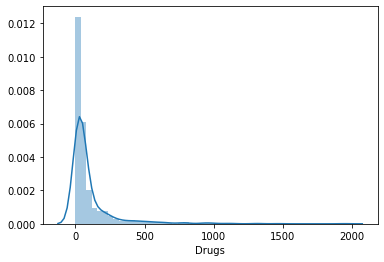

In [112]:
sns.distplot(df['Drugs'])

Looking at corelation between the data

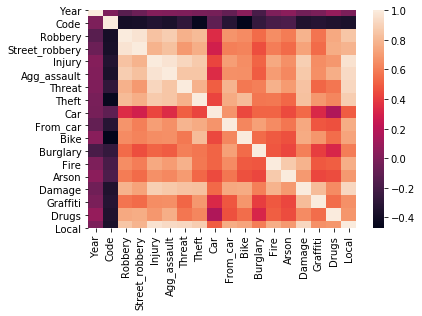

In [113]:
sns.heatmap(df.corr())

In [114]:
df.columns

Index(['Year', 'District', 'Code', 'Location', 'Robbery', 'Street_robbery',
       'Injury', 'Agg_assault', 'Threat', 'Theft', 'Car', 'From_car', 'Bike',
       'Burglary', 'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs', 'Local'],
      dtype='object')

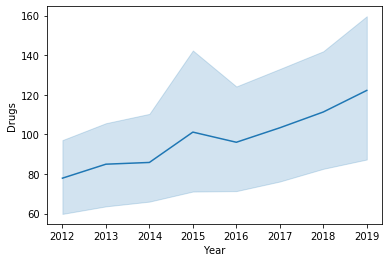

In [115]:
sns.lineplot(df.Year,df.Drugs)

Calculating mean of crime data for each year

In [116]:
years={}
for index in df.index:
    key = df['Year'][index]
    try:
        if key not in years.keys(): 
            years[df['Year'][index]]=[]
        years[df['Year'][index]].append(df['Drugs'][index])
    except:
        years[df['Year'][index]]=df['Drugs'][index]       
for y in years:
    years[y]=sum(years[y])/len(years[y])

Split data into training and testing

In [122]:
xVals,yVals=[],[]
for e in years:
    xVals.append([e])
    yVals.append(years[e])

In [123]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(xVals, yVals,test_size=0.4, random_state=0)

In [130]:
from sklearn.linear_model import LinearRegression

Training the model

In [131]:
lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Running predictions

In [132]:
predictions=lrmodel.predict(X_test)

Validate data

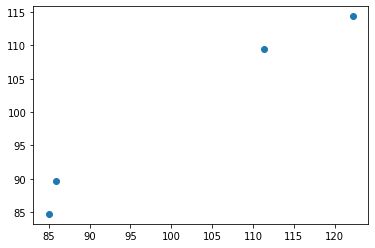

In [133]:
plt.scatter(y_test,predictions)

Regression Evaluation

In [134]:
from sklearn import metrics

In [135]:
print("MEA: " ,metrics.mean_absolute_error(y_test,predictions))
print("MSE: " ,metrics.mean_squared_error(y_test,predictions))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MEA:  3.464880952381389
MSE:  20.170605272112297
RMSE:  4.49116969976779


Calculating R-Squared values

R-squared is a statistical measure of how close the data are to the fitted regression line.

In [138]:
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/np.var(observed))

print(rSquared(y_test,predictions))

0.9226874277682725
